1. Inércia do Modelo K-Means:
Inércia: 44.887604580852816

2. Distribuição dos Clusters:
cluster
2    59
1    50
0    36
3    33
Name: count, dtype: int64

3. Comparação de Clusters com Classes Originais:
cluster   0   1   2   3
classe                 
1         2   0  57   0
2        34   2   2  33
3         0  48   0   0



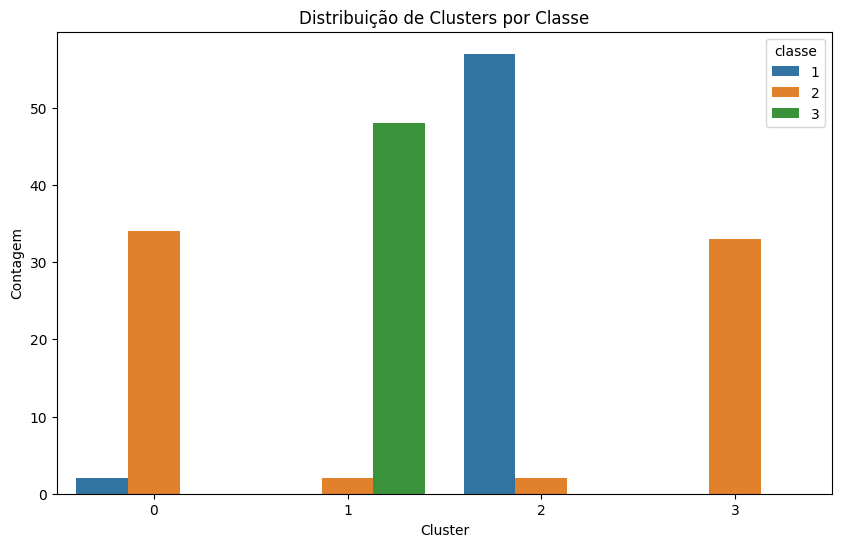

4. Análise de Pureza dos Clusters:
Cluster 0: 94.44%
Cluster 1: 96.00%
Cluster 2: 96.61%
Cluster 3: 100.00%

Pureza Média: 96.76%


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Ler o arquivo CSV com as colunas especificadas
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# 1. Normalização dos Dados
# Dropar a coluna 'classe'
X = vinhos.drop('classe', axis=1)

# Reescala linear dos dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2. Aplicação do K-Means
# Aplicar K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
vinhos['cluster'] = kmeans.fit_predict(X_scaled)

# Apresentar o valor da inércia
print("1. Inércia do Modelo K-Means:")
print(f'Inércia: {kmeans.inertia_}\n')

# 3. Análise dos Clusters
print("2. Distribuição dos Clusters:")
print(vinhos['cluster'].value_counts())
print()

# 4. Comparação com Classes Originais
print("3. Comparação de Clusters com Classes Originais:")
comparacao = pd.crosstab(vinhos['classe'], vinhos['cluster'])
print(comparacao)
print()

# Visualização Adicional: Análise de Distribuição
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='classe', data=vinhos)
plt.title('Distribuição de Clusters por Classe')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.show()

# Análise de Pureza dos Clusters
def calcular_pureza(comparacao):
    pureza_clusters = []
    total_instancias = comparacao.sum().sum()

    for cluster in comparacao.columns:
        cluster_data = comparacao[cluster]
        max_classe = cluster_data.max()
        pureza = max_classe / cluster_data.sum()
        pureza_clusters.append(pureza)

    pureza_media = np.mean(pureza_clusters)

    print("4. Análise de Pureza dos Clusters:")
    for i, pureza in enumerate(pureza_clusters):
        print(f"Cluster {i}: {pureza:.2%}")
    print(f"\nPureza Média: {pureza_media:.2%}")

calcular_pureza(comparacao)